## Eigenstate Evolution

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import animation

from scipy import integrate
from scipy import sparse
from scipy.linalg import eigh_tridiagonal

In [ ]:
Nx = 512                   # number of points -1
x = np.linspace(-7.5, 7.5, Nx)  # spatial grid points
dx = x[1]-x[0]              # spatial separation

Nt = 400                 # time interval for snapshots
t0 = 0.0                    # initial time
tf = 10                     # final time
t = np.linspace(t0, tf, Nt)
dt = t[1]-t[0]


# Physics constant
kx = 2000                   # wave number
m = 1                       # mass
sigma0 = 0.1                # width of initial gaussian wave-packet
mu0 = -3                  # center of initial gaussian wave-packet
hbar = 1                    # reduced plank constant
A = 1.0 / (sigma0 * np.sqrt(np.pi))  # normalization constant
w0 = 1                               # omega for harmonic potential

# Create initial wavefuncition as a Gaussian moving from left to right
#psi0 = np.sqrt(A)*np.exp(-0.5*((x-mu0)/sigma0)**2) * np.exp(1j * kx * x)

# Create initial wavefunction as coherent state
psi0 = (m*w0/np.pi*hbar)**(1/4)*np.exp(-(0.5*m*w0/hbar)*(x-mu0)**2)
const= 1/np.sqrt(np.sum(np.abs(psi0)**2)*dx) #normalization constant
psi0 = psi0*const




In [ ]:
# define potentials to use 

def Heaviside(x, x_0=0, V_high=0):
    return np.where(x>x_0, V_high, 0)
    

def barrier(x, a=-1/2, b=1/2, V_high=1):
    if a>=b:
        raise ValueError("b must be greater than a")

    return np.where((x>a) & (x<b), V_high, 0)

def Harmonic (x, w=1):
    return 0.5* (x)**2 * w**2

Total Probability:  1.0


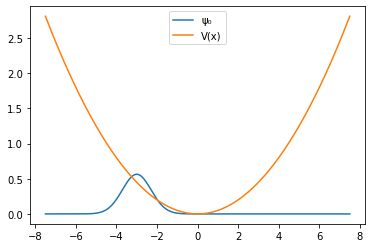

In [ ]:
# Potential V(x)

#V_high = 2*kx**2/2
#x0 = 0
#def V(x): return Heaviside(x, x_0=x0, V_high=V_high)

def V(x): return Harmonic(x, w=w0)

# Plot of i.c. & potential
plt.plot(x, np.abs(psi0)**2, label='\u03c8\u2080')
plt.plot(x,V(x)/10, label='V(x)')
plt.legend()
print("Total Probability: ", np.sum(np.abs(psi0)**2)*dx)

In [ ]:
# BOX BOUNDARY CONDITION: add a 0 in front and at the end of every autovector.
#d = 1/dx**2 + V(x)[1:-1]
#e = -1/(2*dx**2) * np.ones(len(d)-1)

# FREE BOUNDARY CONDITION:
d = 1/dx**2 + V(x)
e = -1/(2*dx**2) * np.ones(len(d)-1)

# Solve eigenvalue problem for tridiagonal matrix
# w are autovalues, v are autovectors
w, v = eigh_tridiagonal(d, e)

In [ ]:
E_js = w[0:400]

# BOX BOUNDARY CONDITION: add a 0 in front and at the end of every autovector.
#psi_js = np.pad(v.T[0:400], [(0, 0), (1, 1)], mode='constant')

# FREE BOUNDARY CONDITION:
psi_js = v.T[0:400]

cs = np.dot(psi_js, psi0)
def psi_t(t):
    return psi_js.T@(cs*np.exp(-1j*E_js*t))

In [ ]:
psi_evol = np.array([psi_t(ti) for ti in t ])


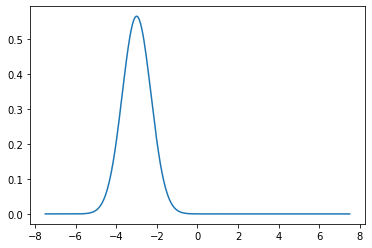

In [ ]:
plt.plot(x, abs(psi_evol[0])**2)

Generating animation


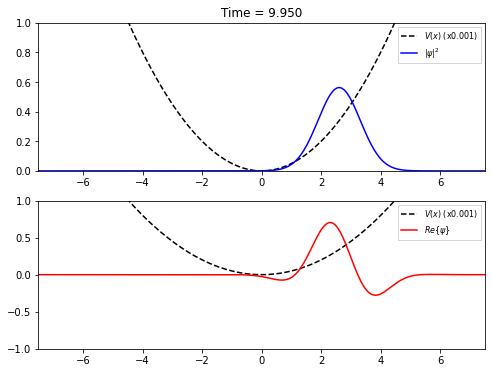

In [ ]:
# Animation settings

duration = 10
fps = 15

fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlim(-7.5, 7.5)
ax1.set_ylim(0, 1)
title = ax1.set_title('')
line11, = ax1.plot([], [], "k--", label=r"$V(x)$ (x0.001)")
line12, = ax1.plot([], [], "b", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlim(-7.5, 7.5)
ax2.set_ylim(-1, 1)
line21, = ax2.plot([], [], "k--", label=r"$V(x)$ (x0.001)")
line22, = ax2.plot([], [], "r", label=r"$Re\{ \psi \}$")
plt.legend(loc=1, fontsize=8, fancybox=False)


def init():
    line11.set_data(x, V(x)/10 )
    line21.set_data(x, V(x)/10 )
    return line11, line21


def animate(i):
    line12.set_data(x, np.abs(psi_evol[i,:])**2)
    line22.set_data(x, np.real(psi_evol[i,:]))
    title.set_text('Time = {0:1.3f}'.format(t[i]))
    return line12, line22


anim = animation.FuncAnimation(fig, animate, init_func=init, interval=1, blit=True, frames=np.linspace(0,len(t),fps*duration, dtype=np.int32,endpoint=False))

writer = animation.FFMpegWriter(fps=fps, bitrate=-1, codec="h264")#, extra_args=['-preset', 'veryslow', '-qp', '0'])
# Save the animation into a short video
print("Generating animation")
# anim.save('step@2x.gif', writer='pillow', fps=15)
# anim.save('step@2x.gif', writer='imagemagick', fps=15, dpi=150, extra_args=['-layers Optimize'])
anim.save('Data/Simulation_video/EigenEvol.mp4', writer=writer, dpi=150)

In [ ]:
# Write data to File
path = './Data/Simulations/'
potential_name = 'Harmonic_w1'
pd.DataFrame(psi_evol).to_csv(path+potential_name+".csv")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=964d390d-0269-41ab-86ee-4ee3752d1778' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>